<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [44]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [45]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("../../DATA/housing.data", header = None, names = names, delim_whitespace = True)

In [46]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Shape
data.shape

(506, 14)

In [47]:
pd.melt(data, id_vars = 'CRIM')

,CRIM,variable,value
0,0.00632,ZN,18.0
1,0.02731,ZN,0.0
2,0.02729,ZN,0.0
3,0.03237,ZN,0.0
4,0.06905,ZN,0.0
...,...,...,...
6573,0.06263,MEDV,22.4
6574,0.04527,MEDV,20.6
6575,0.06076,MEDV,23.9
6576,0.10959,MEDV,22.0


##### 1. Plot Histogram of `RM`

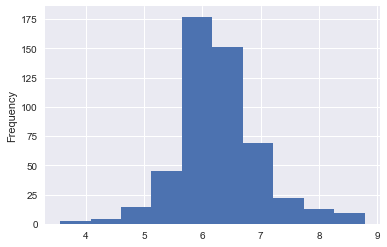

In [ ]:
#  ANSWER
RM = data['RM']
RM.plot(kind='hist');

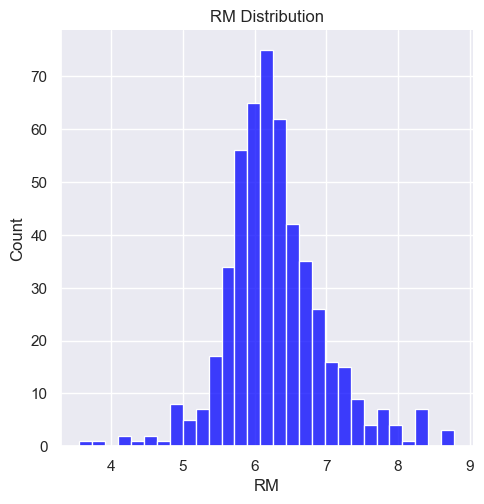

In [43]:
sns.displot(x= 'RM', data= data, color ='blue')
plt.title('RM Distribution')
plt.show()

In [34]:
data.RM.value_counts(bins=27)

(6.074, 6.267]    76
(5.881, 6.074]    75
(6.267, 6.46]     67
(5.687, 5.881]    56
(6.46, 6.654]     45
(6.654, 6.847]    32
(5.494, 5.687]    27
(6.847, 7.04]     26
(5.301, 5.494]    18
(7.04, 7.234]     16
(7.234, 7.427]    14
(4.914, 5.107]     9
(7.814, 8.007]     7
(8.2, 8.393]       6
(7.427, 7.62]      5
(7.62, 7.814]      5
(5.107, 5.301]     4
(8.007, 8.2]       3
(8.587, 8.78]      3
(4.721, 4.914]     3
(4.527, 4.721]     2
(4.334, 4.527]     2
(3.948, 4.141]     2
(3.754, 3.948]     1
(8.393, 8.587]     1
(3.555, 3.754]     1
(4.141, 4.334]     0
Name: RM, dtype: int64

##### 2. Plot Histogram of `MEDV`

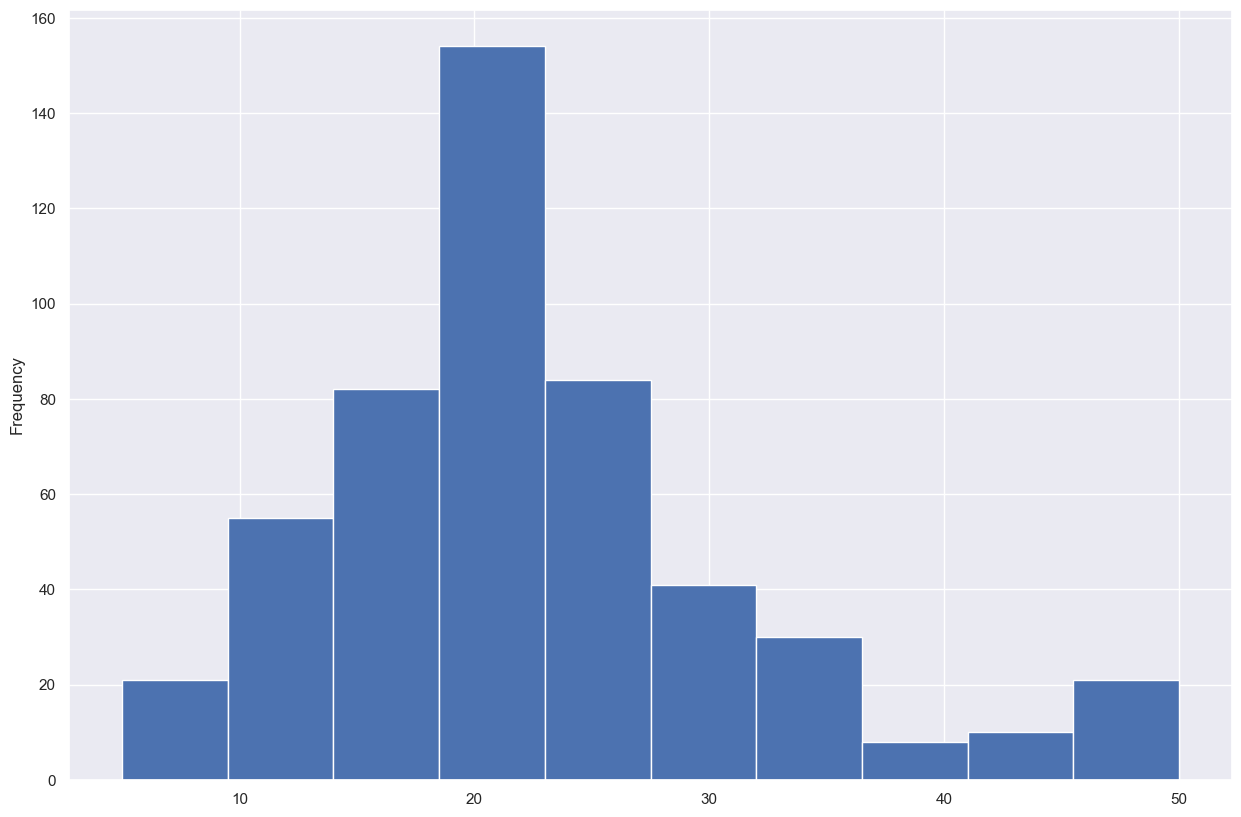

In [37]:
MEDV = data['MEDV']
MEDV.plot(kind='hist');

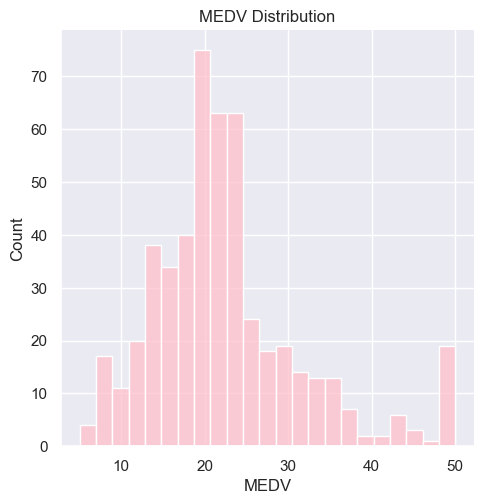

In [38]:
sns.displot(x= MEDV, data = data, color = 'pink')
plt.title('MEDV Distribution')
plt.show()

In [39]:
data.MEDV.value_counts(bins = 23)

(18.696, 20.652]    75
(20.652, 22.609]    63
(22.609, 24.565]    63
(16.739, 18.696]    40
(12.826, 14.783]    38
(14.783, 16.739]    34
(24.565, 26.522]    24
(10.87, 12.826]     20
(48.043, 50.0]      19
(28.478, 30.435]    19
(26.522, 28.478]    18
(6.957, 8.913]      17
(30.435, 32.391]    14
(32.391, 34.348]    13
(34.348, 36.304]    13
(8.913, 10.87]      11
(36.304, 38.261]     7
(42.174, 44.13]      6
(4.954, 6.957]       4
(44.13, 46.087]      3
(38.261, 40.217]     2
(40.217, 42.174]     2
(46.087, 48.043]     1
Name: MEDV, dtype: int64

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

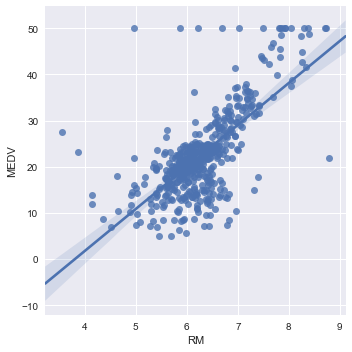

In [ ]:
# ANSWER
sns.lmplot(x="RM", y="MEDV", data=data);

In [ ]:
data['RM'].mean()

6.284634387351787

##### 3.B Is there any trend? State your observation.

**ANSWER:**: There is a positove correlation between `RM` & `MEDV`. 

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [ ]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [7]:
# ANSWER
N = 100
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N)

In [40]:
medv_over_6

464    21.4
253    42.8
294    21.7
47     16.6
189    34.9
78     21.2
55     35.4
453    17.8
247    20.5
279    35.1
213    28.1
200    32.9
360    25.0
283    50.0
130    19.2
44     21.2
84     23.9
161    50.0
287    23.2
319    21.0
396    12.5
157    41.3
338    20.6
290    28.5
160    27.0
441    17.1
173    23.6
102    18.6
93     25.0
114    18.5
97     38.7
428    11.0
92     22.9
249    26.2
88     23.6
311    22.1
402    12.1
292    27.9
2      34.7
6      22.9
219    23.0
108    19.8
314    23.8
443    15.4
113    18.7
324    25.0
175    29.4
258    36.0
267    50.0
229    31.5
302    26.4
306    33.4
356    17.8
460    16.4
358    22.7
370    50.0
220    26.7
0      24.0
446    14.9
262    48.8
4      36.2
286    20.1
463    20.2
273    35.2
237    31.5
82     24.8
437     8.7
3      33.4
224    44.8
75     21.4
252    29.6
233    48.3
166    50.0
137    17.1
259    30.1
271    25.2
91     22.0
296    27.1
369    50.0
155    15.6
452    16.1
502    20.6
472    23.2
478 

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports u

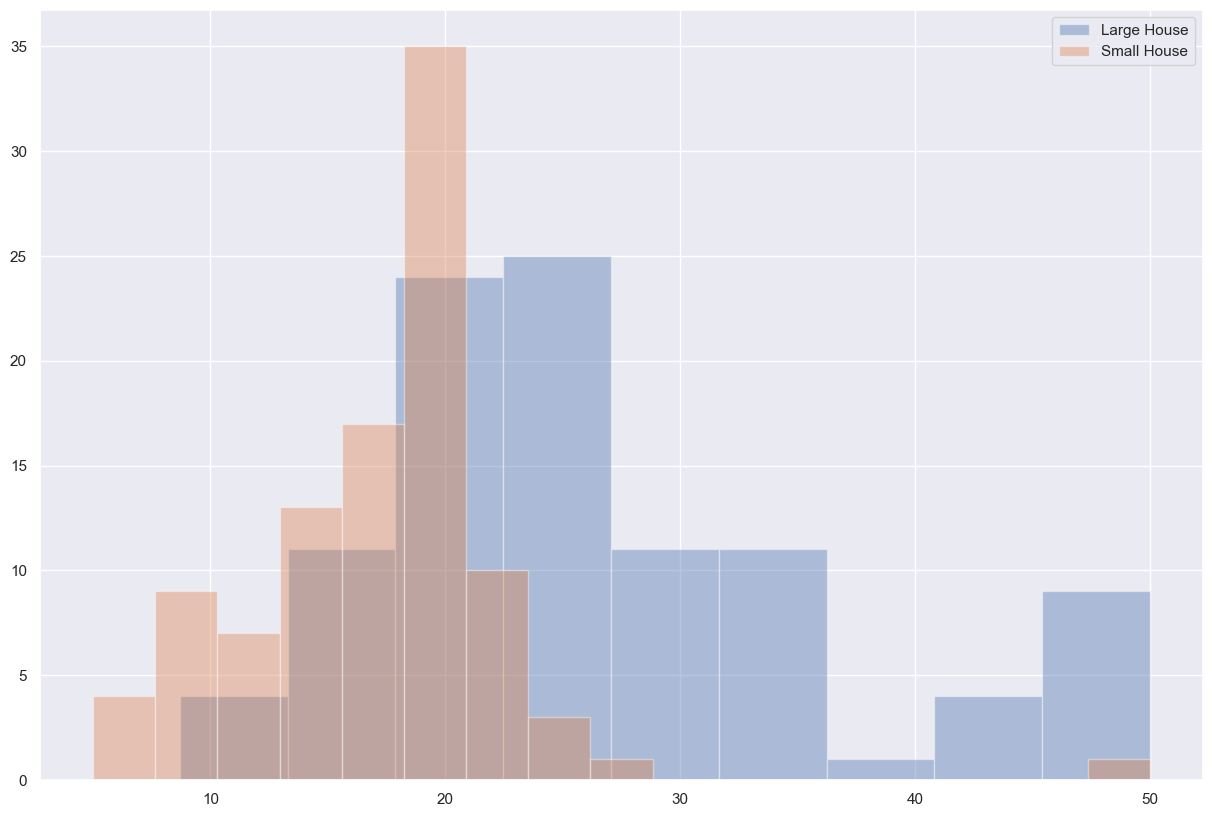

In [19]:
# ANSWER
ax = sns.distplot(medv_over_6, label='Large House', kde=False);
sns.distplot(medv_under_6, ax=ax, label='Small House', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

In [22]:
medv_over_6.value_counts(bins = 9)

(22.467, 27.056]               25
(17.878, 22.467]               24
(13.289, 17.878]               11
(27.056, 31.644]               11
(31.644, 36.233]               11
(45.411, 50.0]                  9
(8.658000000000001, 13.289]     4
(40.822, 45.411]                4
(36.233, 40.822]                1
Name: MEDV, dtype: int64

In [24]:
medv_under_6.value_counts(bins = 10)

(18.5, 23.0]    40
(14.0, 18.5]    25
(9.5, 14.0]     18
(4.954, 9.5]    11
(23.0, 27.5]     4
(27.5, 32.0]     1
(45.5, 50.0]     1
(32.0, 36.5]     0
(36.5, 41.0]     0
(41.0, 45.5]     0
Name: MEDV, dtype: int64

##### 7. Calculate Variance

Calculate variance for both samples.

In [ ]:
# ANSWER
var_medv_over_6 = medv_over_6.var()
print(var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print(var_medv_under_6)

93.26873131313124
46.68345858585862


In [ ]:
# ddof should be 1
np.var(medv_over_6, ddof=1)

93.26873131313124

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [ ]:
# ANSWER
std = np.sqrt((var_medv_over_6 + var_medv_under_6) / 2)
print('std dev:', std)

std dev: 8.365171543339379


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [ ]:
# ANSWER
t = (medv_over_6.mean() - medv_under_6.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

t: 6.179132781310812


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [ ]:
# ANSWER
df = 2 * N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [41]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))
print(f"p= {2* p}")

NameError: name 't' is not defined

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [ ]:
# ANSWER
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "House price does not increase for large house."
    , 'H1': "House price increases for large house."
}

In [ ]:
# ANSWER
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [ ]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = 6.179132781310812
p = 3.6026099881070195e-09
We reject our null hypothesis.
House price increases for large house.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

In [ ]:
# ANSWER
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)
    
    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    
    # Calculate Standard Deviation     
    std = np.sqrt((var_a + var_b) / 2)
    
    # Calculate t-stat    
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic
    
    # Calculate degree of freedom     
    df = 2 * N - 2
    
    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail     
    p = p * 2
    
    return t, p, check_sig(p, alpha)

In [ ]:
# ANSWER
t, p, sig = ttest_ind(medv_over_6, medv_under_6, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

t = 6.179132781310812
p = 3.6026099881070195e-09
We reject our null hypothesis.
House price increases for large house.


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [ ]:
# ANSWER
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 6.179132781310803
p = 3.6026099692277346e-09
We reject our null hypothesis.
House price increases for large house.




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



